<a href="https://colab.research.google.com/github/hswang108/20201007-/blob/main/20201019%E5%8F%B0%E5%8C%97%E5%B8%82%E6%88%BF%E5%B1%8B%E7%B8%BD%E6%88%BF%E5%83%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 讀取原始資料
import os
os.getcwd()
data = pd.read_csv('105-109data2.csv')[1:]   # 第一筆為英文欄位名稱, 直接去掉

In [5]:
data.info()  #看一下資料結構

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42828 entries, 1 to 42828
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   士林區                  42828 non-null  int64  
 1   大同區                  42828 non-null  int64  
 2   大安區                  42828 non-null  int64  
 3   中山區                  42828 non-null  int64  
 4   中正區                  42828 non-null  int64  
 5   內湖區                  42828 non-null  int64  
 6   文山區                  42828 non-null  int64  
 7   北投區                  42828 non-null  int64  
 8   松山區                  42828 non-null  int64  
 9   信義區                  42828 non-null  int64  
 10  南港區                  42828 non-null  int64  
 11  萬華區                  42828 non-null  int64  
 12  交易標的.房地.車位           42828 non-null  int64  
 13  交易標的.房地              42828 non-null  int64  
 14  交易標的.建物              42828 non-null  int64  
 15  都市土地使用分區.住           42828 non-null 

In [6]:
data.describe()    #統計值 

,士林區,大同區,大安區,中山區,中正區,內湖區,文山區,北投區,松山區,信義區,南港區,萬華區,交易標的.房地.車位,交易標的.房地,交易標的.建物,都市土地使用分區.住,都市土地使用分區.商,都市土地使用分區.工,都市土地使用分區.其他,建物型態.辦公商業大樓,建物型態.公寓.5樓含以下無電梯,建物型態.華廈.10層含以下有電梯,建物型態.套房.1房1廳1衛,建物型態.住宅大樓.11層含以上有電梯,建物型態.透天厝,主要用途.住家用,主要用途.住商用,主要用途.住工用,主要用途.國民住宅,主要用途.停車空間,主要用途.見使用執照,土地移轉總面積平方公尺,交易年月日,Q1,Q2,Q3,Q4,移轉層次,陽台,騎樓,平台,走廊,電梯樓梯間,透天厝,停車場,夾層,露台,見其他登記事項,總樓層數,屋齡,建物移轉總面積平方公尺,建物現況格局.房,建物現況格局.廳,建物現況格局.衛,建物現況格局.隔間,有無管理組織,總價元,單價元平方公尺,車位移轉總面積平方公尺,車位總價元,區總價
count,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,42828.000000,4.282800e+04,4.282800e+04,42828.000000,4.282800e+04,4.282800e+04
mean,0.084431,0.042612,0.074297,0.150322,0.056809,0.139418,0.093514,0.121976,0.064234,0.060708,0.033833,0.077846,0.383628,0.616326,0.000047,0.610465,0.306809,0.009246,0.073457,0.034720,0.220370,0.230784,0.127487,0.370435,0.016204,0.034720,0.220370,0.230784,0.127487,0.370435,0.016204,29.652897,106.514056,0.237532,0.287219,0.194499,0.280751,1.584863,0.017325,0.005230,0.003362,0.000771,0.008919,0.016204,0.001564,0.002568,0.000911,0.002078,10.409102,23.521388,147.139301,2.377113,1.531148,1.515971,0.911623,0.668418,2.758301e+07,1.843017e+05,13.321519,6.517953e+05,2.758228e+07
std,0.278036,0.201984,0.262257,0.357391,0.231479,0.346386,0.291154,0.327262,0.245172,0.238797,0.180801,0.267933,0.486275,0.486286,0.006834,0.487651,0.461175,0.095713,0.260888,0.183073,0.414501,0.421339,0.333521,0.482927,0.126262,0.183073,0.414501,0.421339,0.333521,0.482927,0.126262,111.015126,1.130545,0.425576,0.452470,0.395819,0.449371,0.884982,0.130481,0.072132,0.057888,0.027748,0.094022,0.126262,0.039522,0.050615,0.030163,0.045539,5.591981,15.954158,574.954191,1.485276,0.800265,0.984007,0.283845,0.470787,1.007136e+08,1.104988e+05,32.542988,2.083931e+06,1.162165e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000e+03,9.000000e+00,0.000000,0.000000e+00,1.538000e+06
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.670000,106.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,7.000000,72.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.080000e+07,1.345738e+05,0.000000,0.000000e+00,1.961563e+07
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.620000,107.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,24.000000,1

In [7]:
def miss(x):
    return sum(pd.isnull(x)) / len(x)

miss_result = dict()

for column in data.columns:
    miss_result[column] = miss(data[column])

# 排序一下, 看比較清楚

miss_result = sorted(miss_result.items(), key=lambda s: s[1], reverse=True)  # 使用sorted, 然後用缺失比例來排序, 與就是s[1]
miss_result

[('士林區', 0.0),
 ('大同區', 0.0),
 ('大安區', 0.0),
 ('中山區', 0.0),
 ('中正區', 0.0),
 ('內湖區', 0.0),
 ('文山區', 0.0),
 ('北投區', 0.0),
 ('松山區', 0.0),
 ('信義區', 0.0),
 ('南港區', 0.0),
 ('萬華區', 0.0),
 ('交易標的.房地.車位', 0.0),
 ('交易標的.房地', 0.0),
 ('交易標的.建物', 0.0),
 ('都市土地使用分區.住', 0.0),
 ('都市土地使用分區.商', 0.0),
 ('都市土地使用分區.工', 0.0),
 ('都市土地使用分區.其他', 0.0),
 ('建物型態.辦公商業大樓', 0.0),
 ('建物型態.公寓.5樓含以下無電梯', 0.0),
 ('建物型態.華廈.10層含以下有電梯', 0.0),
 ('建物型態.套房.1房1廳1衛', 0.0),
 ('建物型態.住宅大樓.11層含以上有電梯', 0.0),
 ('建物型態.透天厝', 0.0),
 ('主要用途.住家用', 0.0),
 ('主要用途.住商用', 0.0),
 ('主要用途.住工用', 0.0),
 ('主要用途.國民住宅', 0.0),
 ('主要用途.停車空間', 0.0),
 ('主要用途.見使用執照', 0.0),
 ('土地移轉總面積平方公尺', 0.0),
 ('交易年月日', 0.0),
 ('Q1', 0.0),
 ('Q2', 0.0),
 ('Q3', 0.0),
 ('Q4', 0.0),
 ('移轉層次', 0.0),
 ('陽台', 0.0),
 ('騎樓', 0.0),
 ('平台', 0.0),
 ('走廊', 0.0),
 ('電梯樓梯間', 0.0),
 ('透天厝', 0.0),
 ('停車場', 0.0),
 ('夾層', 0.0),
 ('露台', 0.0),
 ('見其他登記事項', 0.0),
 ('總樓層數', 0.0),
 ('屋齡', 0.0),
 ('建物移轉總面積平方公尺', 0.0),
 ('建物現況格局.房', 0.0),
 ('建物現況格局.廳', 0.0),
 ('建物現況格局.衛', 0.0),
 ('建物現況格局.隔間', 

In [9]:
# 處理異常值
# read data

import numpy as np
import pandas as pd

data = pd.read_csv('105-109data2.csv')   # 大部分前處理完的資料(剩下異常值偵測)
y = pd.DataFrame(data['總價元'])  # 要改成總價
y = np.array(y).flatten()        # 把shape 修正正確
X = data.drop(columns=['總價元', '單價元平方公尺', '區總價'])   # 先不要加入區總價


In [10]:
# 前處過後資料筆數
print(f'X.shape: {X.shape}')
print(f'X.columns: {X.columns}')

# 重新檢視一遍資料分布情形
# 找出異常的
# for column in X.columns:
#     if X[column].quantile(0.99) > X[column].mean() * 10:
#         print(column)
#         print(X[column].describe())

zero_one_columns = []

for column in X.columns:
    if X[column].quantile(1) == 1:
        zero_one_columns.append(column)

print(f'0, 1數值的columns: {zero_one_columns}')
print(f'0, 1數值的columns個數: {len(zero_one_columns)}')

X.shape: (42829, 58)
X.columns: Index(['士林區', '大同區', '大安區', '中山區', '中正區', '內湖區', '文山區', '北投區', '松山區', '信義區',
       '南港區', '萬華區', '交易標的.房地.車位', '交易標的.房地', '交易標的.建物', '都市土地使用分區.住',
       '都市土地使用分區.商', '都市土地使用分區.工', '都市土地使用分區.其他', '建物型態.辦公商業大樓',
       '建物型態.公寓.5樓含以下無電梯', '建物型態.華廈.10層含以下有電梯', '建物型態.套房.1房1廳1衛',
       '建物型態.住宅大樓.11層含以上有電梯', '建物型態.透天厝', '主要用途.住家用', '主要用途.住商用', '主要用途.住工用',
       '主要用途.國民住宅', '主要用途.停車空間', '主要用途.見使用執照', '土地移轉總面積平方公尺', '交易年月日', 'Q1',
       'Q2', 'Q3', 'Q4', '移轉層次', '陽台', '騎樓', '平台', '走廊', '電梯樓梯間', '透天厝', '停車場',
       '夾層', '露台', '見其他登記事項', '總樓層數', '屋齡', '建物移轉總面積平方公尺', '建物現況格局.房',
       '建物現況格局.廳', '建物現況格局.衛', '建物現況格局.隔間', '有無管理組織', '車位移轉總面積平方公尺', '車位總價元'],
      dtype='object')
0, 1數值的columns: ['士林區', '大同區', '大安區', '中山區', '中正區', '內湖區', '文山區', '北投區', '松山區', '信義區', '南港區', '萬華區', '交易標的.房地.車位', '交易標的.房地', '交易標的.建物', '都市土地使用分區.住', '都市土地使用分區.商', '都市土地使用分區.工', '都市土地使用分區.其他', '建物型態.辦公商業大樓', '建物型態.公寓.5樓含以下無電梯', '建物型態.華廈.10層含以下有電梯', '建物型態.套房.1房1廳1衛', '建物型態.住宅大樓.11層

In [11]:
# 需要從非0, 1的columns去看異常值

X_del = X.drop(columns=zero_one_columns)
X_del.head()

,土地移轉總面積平方公尺,交易年月日,移轉層次,總樓層數,屋齡,建物移轉總面積平方公尺,建物現況格局.房,建物現況格局.廳,建物現況格局.衛,車位移轉總面積平方公尺,車位總價元
0,0.02,105,1.0,5,53,42,3,1,1,0,0
1,6.72,105,1.0,12,41,72,2,2,1,0,0
2,213.58,105,1.0,4,11,450,6,3,4,33,2800000
3,23.50,105,2.0,7,37,119,4,3,3,0,0
4,54.80,105,1.0,5,32,147,4,2,2,0,0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


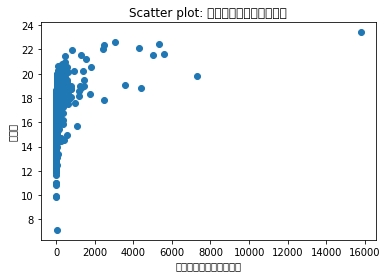

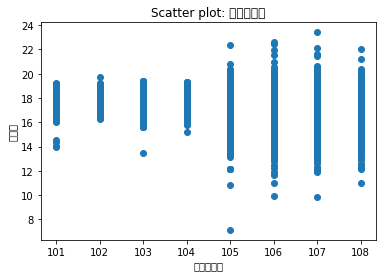

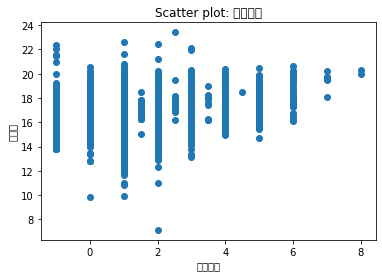

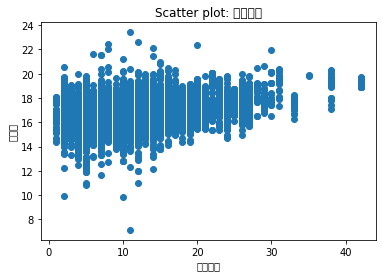

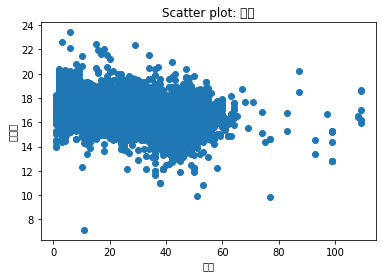

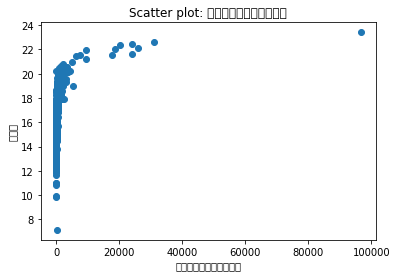

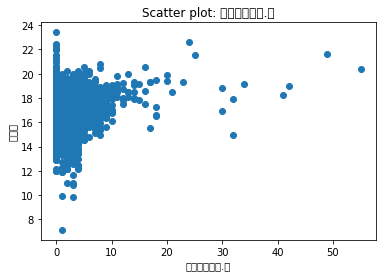

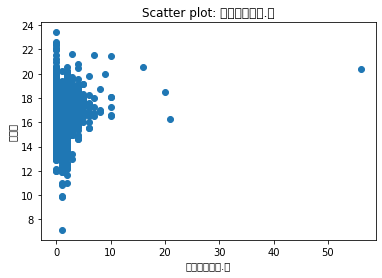

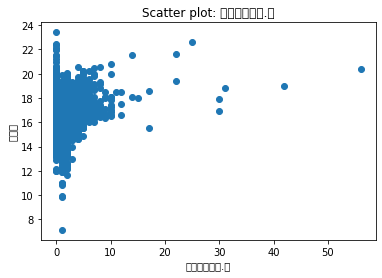

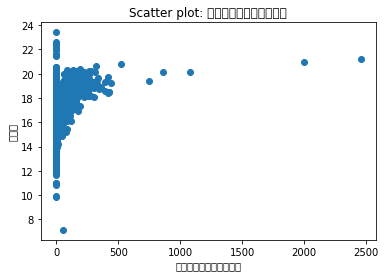

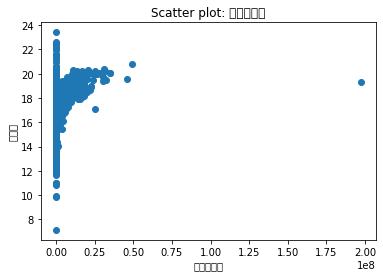

In [12]:
# draw scatter plots去看是否有異常
# 最後發現有一個離群值異常明顯

# 忽略警告訊息
%matplotlib inline
import warnings                             
warnings.filterwarnings('ignore')

# 顯示中文字
from matplotlib.font_manager import FontProperties

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plot_lists = X_del.columns

def draw_scatter():
    for c in plot_lists:
        plt.scatter(data[c], np.log(data['總價元']))   # 要用log轉換
        plt.title('Scatter plot: ' + c)
        plt.xlabel(c)
        plt.ylabel('總價元')
        plt.show()
draw_scatter()

In [13]:
print(f'刪除異常值前 X.shape: {data.shape}')
data = data.loc[data['建物移轉總面積平方公尺'] < data['建物移轉總面積平方公尺'].mean()+3*data['建物移轉總面積平方公尺'].std()]
print(f'刪除異常值後 X.shape: {data.shape}')

刪除異常值前 X.shape: (42829, 61)
刪除異常值後 X.shape: (42797, 61)


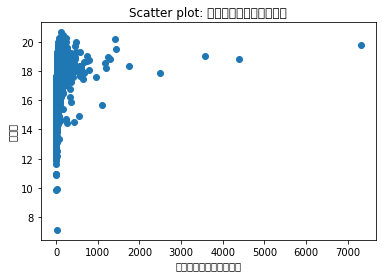

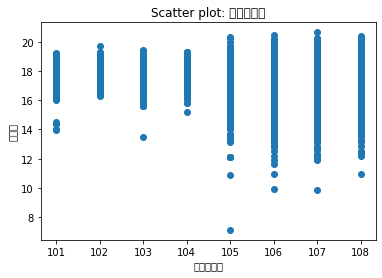

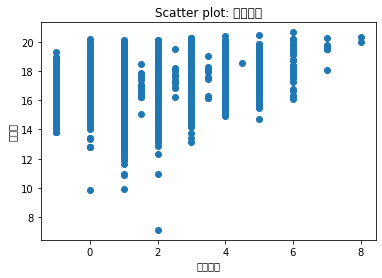

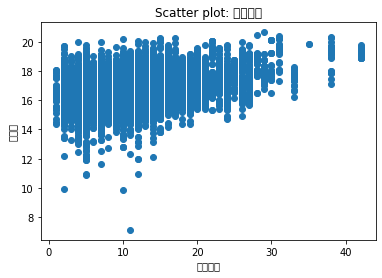

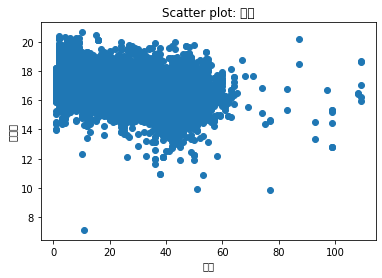

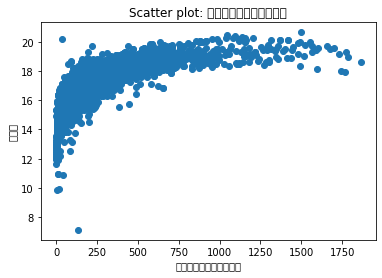

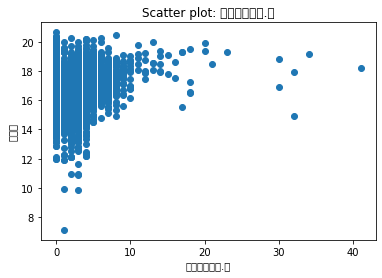

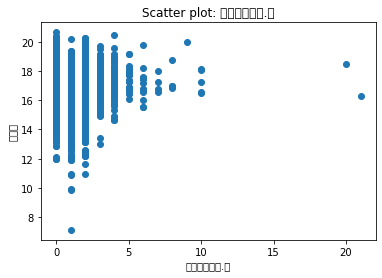

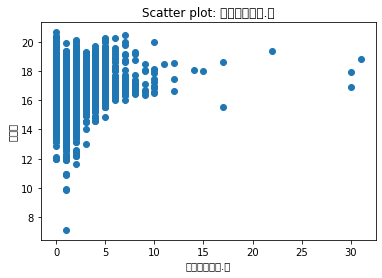

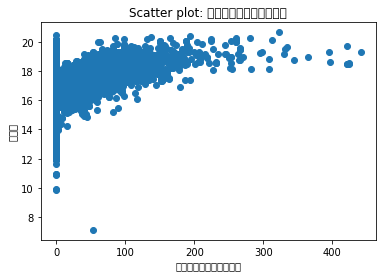

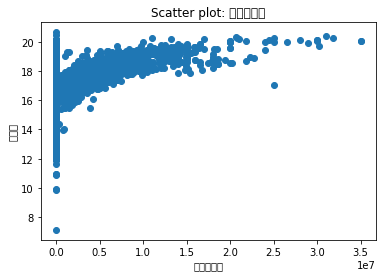

In [14]:
# 再畫一次, 異常值已經去除
draw_scatter()

In [15]:
# 相關係數

corr_matrix = data.corr()       # 直接得到相關係數的矩陣
target_corr = corr_matrix['總價元'].sort_values(ascending=False)   # 這個要有x有y的, 對總價元的相關係數, 大到小排列
target_corr

總價元                 1.000000
建物移轉總面積平方公尺         0.830508
車位總價元               0.615846
車位移轉總面積平方公尺         0.570059
單價元平方公尺             0.445086
                      ...   
主要用途.住商用           -0.196744
建物型態.公寓.5樓含以下無電梯   -0.196744
屋齡                 -0.269903
建物現況格局.隔間          -0.276531
交易標的.房地            -0.360529
Name: 總價元, Length: 61, dtype: float64

In [16]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Text(0.5, 1.0, '+top10 - 熱力圖')

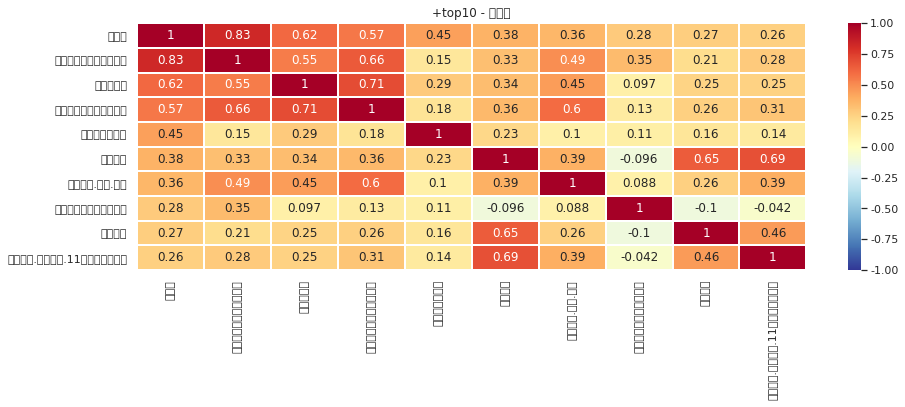

In [17]:
# 忽略警告訊息
%matplotlib inline
import warnings                             # 忽略警告
warnings.filterwarnings('ignore')

# 顯示中文字, note內有, 解決Python3那個
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

plt.figure(figsize = (15, 10))            # 設定figsize, 很直觀
# 繪製相關係數 (correlations) 的 Heatmap
# note:
# cmap: colors, 有需要自己調色再去查, 不然不設定也是無所謂
# vmin: 顏色值的最小值
# vmax: 顏色值的最大值
# annot: 註釋資料
# f, (ax1,ax2) = plt.subplots(figsize = (18, 12),nrows=2)

# sns.heatmap(corr_matrix, cmap = plt.cm.RdYlBu_r, vmin = -1.0, annot = True, vmax = 1.0)
# plt.title('熱力圖')

negative_top_ten = list(target_corr[-9:].index)
negative_top_ten.insert(0, '總價元')

positive_top_ten = data[target_corr[:10].index]
negative_top_ten = data[negative_top_ten]

positive_top_ten_corr = positive_top_ten.corr()
negative_top_ten_corr = negative_top_ten.corr()

plt.subplot(211)
sns.heatmap(positive_top_ten_corr, cmap = plt.cm.RdYlBu_r, vmin = -1.0, annot = True, vmax = 1.0, linewidths=1)
plt.title('+top10 - 熱力圖')

Text(0.5, 1.0, '-top10 - 熱力圖')

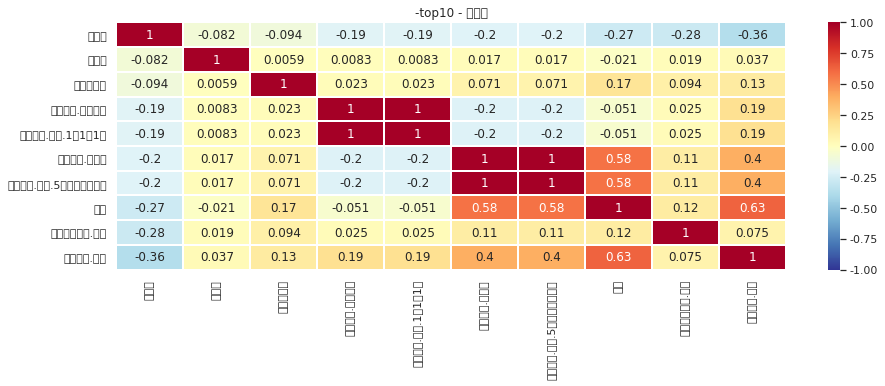

In [18]:
plt.figure(figsize = (15, 10))            # 設定figsize, 很直觀

plt.subplot(212)
sns.heatmap(negative_top_ten_corr, cmap = plt.cm.RdYlBu_r, vmin = -1.0, annot = True, vmax = 1.0, linewidths=1)
plt.title('-top10 - 熱力圖')

In [19]:
# 期望模型
# 真正分資料
import numpy as np
import pandas as pd
# 這是完整檔案
y = pd.DataFrame(data['總價元'])  # 要改成總價
y = np.array(y).flatten()        # 把shape 修正正確
X = data.drop(columns=['總價元', '單價元平方公尺', '區總價'])   # 先不要加入區總價, 這是特徵工程的部分


# 行政區
# data = data.drop(columns=['總價元', '單價元平方公尺', '區總價'])
# 區總價
# data = data.drop(columns=['總價元', '單價元平方公尺', '士林區', '大同區', '大安區', '中山區', '中正區', '內湖區', '文山區', '北投區', '松山區', '信義區',
#        '南港區', '萬華區'])

In [20]:
# 將資料按照年份切分
X_105 = X[np.where(X['交易年月日'] <= 105, True, False)]
X_106 = X[np.where(X['交易年月日'] <= 106, True, False)]
X_107 = X[np.where(X['交易年月日'] <= 107, True, False)]
X_108 = X[np.where(X['交易年月日'] <= 108, True, False)]

y_106 = y[np.where(X['交易年月日'] <= 106, True, False)]


X_107_only = X[np.where(X['交易年月日'] == 107, True, False)]
y_107_only = y[np.where(X['交易年月日'] == 107, True, False)]

print(X_108['交易年月日'].value_counts())

107    14998
106    14342
108     7864
105     4061
103      652
104      478
102      258
101      144
Name: 交易年月日, dtype: int64


In [25]:
# 將模型評估融入scikit-learn方便之後觀察。
from sklearn.metrics import make_scorer
import numpy as np

def display_scores(scores):
    """
    模型評估分數的展示
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def hit_rate(y_pred, y_real, threshold=0.1):
    """
    模型評估, hit-rate
    """
    y_pred = np.array(y_pred)
    y_real = np.array(y_real)
    z = np.abs(y_pred - y_real) / y_real
    z = np.where(z <= threshold, 1, 0)

    return np.sum(z) / y_pred.shape[0]

# 建立自己的模型評估
hit_rate_scorer = make_scorer(hit_rate, greater_is_better = True)

In [26]:
# 訓練集與測試集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 用6:2:2 訓練、驗證、測試
X_train, y_train = X_106.copy(), y_106
X_val, X_test, y_val, y_test = train_test_split(X_107_only, y_107_only, test_size=0.5, random_state=42, shuffle=True)

# 標準化
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)  
# X_val = scaler.fit_transform(X_val)
# X_test = scaler.fit_transform(X_test)

In [27]:
print(X_train.shape)
X_train

(19935, 58)


,士林區,大同區,大安區,中山區,中正區,內湖區,文山區,北投區,松山區,信義區,南港區,萬華區,交易標的.房地.車位,交易標的.房地,交易標的.建物,都市土地使用分區.住,都市土地使用分區.商,都市土地使用分區.工,都市土地使用分區.其他,建物型態.辦公商業大樓,建物型態.公寓.5樓含以下無電梯,建物型態.華廈.10層含以下有電梯,建物型態.套房.1房1廳1衛,建物型態.住宅大樓.11層含以上有電梯,建物型態.透天厝,主要用途.住家用,主要用途.住商用,主要用途.住工用,主要用途.國民住宅,主要用途.停車空間,主要用途.見使用執照,土地移轉總面積平方公尺,交易年月日,Q1,Q2,Q3,Q4,移轉層次,陽台,騎樓,平台,走廊,電梯樓梯間,透天厝,停車場,夾層,露台,見其他登記事項,總樓層數,屋齡,建物移轉總面積平方公尺,建物現況格局.房,建物現況格局.廳,建物現況格局.衛,建物現況格局.隔間,有無管理組織,車位移轉總面積平方公尺,車位總價元
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.02,105,0,0,0,1,1.0,0,0,0,0,0,0,0,0,0,0,5,53,42,3,1,1,1,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,6.72,105,0,0,0,1,1.0,0,0,0,0,0,0,0,0,0,0,12,41,72,2,2,1,1,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,213.58,105,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,4,11,450,6,3,4,1,1,33,2800000
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,23.50,105,0,0,1,0,2.0,0,0,0,0,0,0,0,0,0,0,7,37,119,4,3,3,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,54.80,105,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,5,32,147,4,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42687,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,9.65,106,0,0,0,1,1.0,0,0,0,0,0,0,0,0,0,0,15,1,97,2,1,1,1,1,0,0
42741,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,42.20,106,1,0,0,0,4.0,0,0,0,0,0,0,0,0,0,0,23,2,541,3,2,4,1,0,104,12000000
42742,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,42.20,105,0,0,0,1,4.0,0,0,0,0,0,0,0,0,0,0,23,2,541,0,0,0,0,0,104,12000000
42746,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28.61,105,0,0,0,1,1.0,0,0,0,0,0,0,0,0,0,0,9,1,176,3,2,2,1,0,42,2200000


In [28]:
# 線性回歸model、決策樹、隨機森林
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings                             # 忽略警告
warnings.filterwarnings('ignore')

# 模型初始化, 先用默認參數
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR()                    # 效果太差了
lasso = Lasso()
bayes = BayesianRidge()
mlpr = MLPRegressor()
gdbt = GradientBoostingRegressor()

# 裝在dict, 方便一次處理
# models = {'線性回歸': lr, '決策樹': dt, '隨機森林': rf, '支持向量機': svm}
models = {'線性回歸': lr, '決策樹': dt, '隨機森林': rf}
# models = {'Lasso': lasso, '貝氏回歸': bayes, 'MLPR': mlpr, 'GDBT': gdbt}

# 這是交叉驗證的方法, 因為時間因素無法直接用套件, 會產生時間窺探問題
# for name, model in models.items():
#     print(name)
#     scores = cross_val_score(model, X_train, y_train, scoring=hit_rate_scorer, cv=10)
#     display_scores(scores)
#     print()

# 模型訓練, 使用106前資料, 預測、驗證使用107資料, 確保沒有時間窺探
for name, model in models.items():
    print(name, "訓練中~~~")
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    print('驗證資料')
    print(f'{name} --- hit-rate(0.1): {hit_rate(y_pred_val, y_val, 0.1)}')
    print(f'{name} --- hit-rate(0.2): {hit_rate(y_pred_val, y_val, 0.2)}')
    print('測試資料')
    print(f'{name} --- hit-rate(0.1): {hit_rate(y_pred_test, y_test, 0.1)}')
    print(f'{name} --- hit-rate(0.2): {hit_rate(y_pred_test, y_test, 0.2)}')
    print()

線性回歸 訓練中~~~
驗證資料
線性回歸 --- hit-rate(0.1): 0.21602880384051207
線性回歸 --- hit-rate(0.2): 0.4024536604880651
測試資料
線性回歸 --- hit-rate(0.1): 0.21256167488998534
線性回歸 --- hit-rate(0.2): 0.4065875450060008

決策樹 訓練中~~~
驗證資料
決策樹 --- hit-rate(0.1): 0.3624483264435258
決策樹 --- hit-rate(0.2): 0.5867448993199094
測試資料
決策樹 --- hit-rate(0.1): 0.3681824243232431
決策樹 --- hit-rate(0.2): 0.5782104280570742

隨機森林 訓練中~~~
驗證資料
隨機森林 --- hit-rate(0.1): 0.43539138551806905
隨機森林 --- hit-rate(0.2): 0.7075610081344179
測試資料
隨機森林 --- hit-rate(0.1): 0.4397919722629684
隨機森林 --- hit-rate(0.2): 0.6984931324176556



In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV # GridSearchCV找最好超參數的值


param_grid = {'n_estimators': [3, 10, 30, 100, 200], 'max_features': [2, 4, 6, 8], 'max_depth': [1, 10, 100, 150]} #n_estimators:代表有幾棵樹
  
forest_reg = RandomForestRegressor(random_state=42, min_samples_leaf=2)  # estimator
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,                 # GridSearch 
                           scoring=hit_rate_scorer,
                           return_train_score=True)

In [30]:
# 開始網格搜尋最佳超參數
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [31]:
# 看結果
# print(grid_search.cv_results_)
best_params = grid_search.best_params_
# print(grid_search.best_score_)

#看各組的成績
cvres = grid_search.cv_results_
for hitRate, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(hitRate, params)

print(f'最佳超參數: {best_params}')

0.10173062452972159 {'max_depth': 1, 'max_features': 2, 'n_estimators': 3}
0.09335339854527214 {'max_depth': 1, 'max_features': 2, 'n_estimators': 10}
0.09616252821670428 {'max_depth': 1, 'max_features': 2, 'n_estimators': 30}
0.09781790820165538 {'max_depth': 1, 'max_features': 2, 'n_estimators': 100}
0.09867067970905444 {'max_depth': 1, 'max_features': 2, 'n_estimators': 200}
0.10072736393278155 {'max_depth': 1, 'max_features': 4, 'n_estimators': 3}
0.10213192876849761 {'max_depth': 1, 'max_features': 4, 'n_estimators': 10}
0.1015299724103336 {'max_depth': 1, 'max_features': 4, 'n_estimators': 30}
0.10484073238023577 {'max_depth': 1, 'max_features': 4, 'n_estimators': 100}
0.10474040632054175 {'max_depth': 1, 'max_features': 4, 'n_estimators': 200}
0.09922247303737146 {'max_depth': 1, 'max_features': 6, 'n_estimators': 3}
0.10248306997742662 {'max_depth': 1, 'max_features': 6, 'n_estimators': 10}
0.11045899172310007 {'max_depth': 1, 'max_features': 6, 'n_estimators': 30}
0.1103586656

In [32]:
# 重新build 隨機森林模型
randomForest = RandomForestRegressor(max_depth=100, max_features=8, n_estimators=200)
randomForest.fit(X_train, y_train)
y_pred_test = randomForest.predict(X_test)

print(f'hit-rate(0.1): {hit_rate(y_pred_test, y_test, 0.1)}')
print(f'hit-rate(0.2): {hit_rate(y_pred_test, y_test, 0.2)}')

hit-rate(0.1): 0.40685424723296437
hit-rate(0.2): 0.6622216295506067


In [33]:
# RandomSearch方法
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# estimator
randomForest_random = RandomForestRegressor()

# 給定參數搜尋範圍，可以為list or distribuion
param_dist = {"n_estimators": [10, 100, 200],             # 給定list
              "max_depth": [3, 10, 100, 200],             # 給定list
              "max_features": sp_randint(1, 11),          # 給定distribution
              "min_samples_split": sp_randint(2, 11),     # 給定distribution
              "bootstrap": [True, False]                  # 給定list
              }

# 用RandomSearch+CV選取超参数
n_iter_search = 20
random_search = RandomizedSearchCV(randomForest_random, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False, scoring=hit_rate_scorer)

In [34]:
# RandomSearch尋找超參數比較快, 訓練
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [35]:
# 看結果
best_params_2 = random_search.best_params_

#看各組的成績
cvres_2 = random_search.cv_results_
for hitRate, params in zip(cvres_2["mean_test_score"], cvres_2["params"]):
    print(hitRate, params)

print(f'最佳超參數: {best_params_2}')

0.32671181339352895 {'bootstrap': False, 'max_depth': 100, 'max_features': 4, 'min_samples_split': 9, 'n_estimators': 10}
0.3497868071231502 {'bootstrap': True, 'max_depth': 200, 'max_features': 5, 'min_samples_split': 8, 'n_estimators': 200}
0.3056935038876348 {'bootstrap': False, 'max_depth': 200, 'max_features': 1, 'min_samples_split': 6, 'n_estimators': 100}
0.38625532982192123 {'bootstrap': True, 'max_depth': 200, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 200}
0.3562578379734136 {'bootstrap': False, 'max_depth': 200, 'max_features': 6, 'min_samples_split': 3, 'n_estimators': 10}
0.3526962628542764 {'bootstrap': False, 'max_depth': 200, 'max_features': 4, 'min_samples_split': 8, 'n_estimators': 100}
0.2793579132179584 {'bootstrap': True, 'max_depth': 100, 'max_features': 1, 'min_samples_split': 3, 'n_estimators': 10}
0.3283671933784801 {'bootstrap': False, 'max_depth': 100, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.38545272134436925 {'bootst

In [36]:
# 重新build隨機森林
# 結果更好了些, 但速度快得多, 也能探索更多超參數
randomForest_2 = RandomForestRegressor(bootstrap=True, max_depth=100, max_features=10, min_samples_split=3, n_estimators=200)
randomForest_2.fit(X_train, y_train)
y_pred_test = randomForest_2.predict(X_test)

print(f'hit-rate(0.1): {hit_rate(y_pred_test, y_test, 0.1)}')
print(f'hit-rate(0.2): {hit_rate(y_pred_test, y_test, 0.2)}')

hit-rate(0.1): 0.4167222296306174
hit-rate(0.2): 0.6748899853313776


In [37]:
def fill_hp(data):
    hp = {
        '1080010': 281.66, '1080100': 284.13, '1081000': 280.45,
        '1070001': 279.76, '1070010': 278.04, '1070100': 275.93, '1071000': 276.3,
        '1060001': 267.73, '1060010': 271.57, '1060100': 273.97, '1061000': 274.44,
        '1050001': 270.97, '1050010': 269.52, '1050100': 276.76, '1051000': 271.36,
        '1040001': 273.98, '1040010': 286.22, '1040100': 289.6, '1041000': 302.06,
        '1030001': 294.26, '1030010': 297.45, '1030100': 310.2, '1031000': 298.5,
        '1020001': 304.85, '1020010': 294.89, '1020100': 292.94, '1021000': 284.55,
        '1010001': 269.15, '1010010': 268.28, '1010100': 262.7, '1011000': 254.19
    }
    return hp[data]

# 增加房價指數
data['HP'] = data['交易年月日'].astype(str) + data['Q1'].astype(str) + data['Q2'].astype(str) + data['Q3'].astype(str) + data['Q4'].astype(str)
data['HP'] = data['HP'].apply(fill_hp)


# 重新切分
X = data.drop(columns=['總價元', '單價元平方公尺', '區總價']) 

X_105 = X[np.where(X['交易年月日'] <= 105, True, False)]
X_106 = X[np.where(X['交易年月日'] <= 106, True, False)]
X_107 = X[np.where(X['交易年月日'] <= 107, True, False)]
X_108 = X[np.where(X['交易年月日'] <= 108, True, False)]

y_106 = y[np.where(X['交易年月日'] <= 106, True, False)]


X_107_only = X[np.where(X['交易年月日'] == 107, True, False)]
y_107_only = y[np.where(X['交易年月日'] == 107, True, False)]

X_train, y_train = X_106.copy(), y_106
X_val, X_test, y_val, y_test = train_test_split(X_107_only, y_107_only, test_size=0.5, random_state=42, shuffle=True)

In [38]:
# 重新訓練 model, 看成效如何
# 結果是下跌的, 故不採用

randomForest_2 = RandomForestRegressor(bootstrap=True, max_depth=100, max_features=10, min_samples_split=3, n_estimators=200)
randomForest_2.fit(X_train, y_train)
y_pred_test = randomForest_2.predict(X_test)

print(f'hit-rate(0.1): {hit_rate(y_pred_test, y_test, 0.1)}')
print(f'hit-rate(0.2): {hit_rate(y_pred_test, y_test, 0.2)}')

hit-rate(0.1): 0.40445392719029205
hit-rate(0.2): 0.6624883317775704


In [40]:
# 換嘗試將行政區改成區總價
# 記得去除異常值

data = pd.read_csv('105-109data2.csv')   # 大部分前處理完的資料(剩下異常值偵測)
data = data.drop(columns=['士林區', '大同區', '大安區', '中山區', '中正區', '內湖區', '文山區', '北投區', '松山區', '信義區',
       '南港區', '萬華區'])
data = data.loc[data['建物移轉總面積平方公尺'] < data['建物移轉總面積平方公尺'].mean()+3*data['建物移轉總面積平方公尺'].std()]

In [41]:
# 重新切分
y = pd.DataFrame(data['總價元'])  # 要改成總價
y = np.array(y).flatten()        # 把shape 修正正確
X = data.drop(columns=['總價元', '單價元平方公尺']) 

X_105 = X[np.where(X['交易年月日'] <= 105, True, False)]
X_106 = X[np.where(X['交易年月日'] <= 106, True, False)]
X_107 = X[np.where(X['交易年月日'] <= 107, True, False)]
X_108 = X[np.where(X['交易年月日'] <= 108, True, False)]

y_106 = y[np.where(X['交易年月日'] <= 106, True, False)]


X_107_only = X[np.where(X['交易年月日'] == 107, True, False)]
y_107_only = y[np.where(X['交易年月日'] == 107, True, False)]

X_train, y_train = X_106.copy(), y_106
X_val, X_test, y_val, y_test = train_test_split(X_107_only, y_107_only, test_size=0.5, random_state=42, shuffle=True)

In [42]:
# 重新跑一次模型, 看成效如何
# hit-rate下降有點太多, 雖然訓練速度快速很多, 根據實際應用狀況決定是否採用。

randomForest_2 = RandomForestRegressor(bootstrap=True, max_depth=100, max_features=10, min_samples_split=3, n_estimators=200)
randomForest_2.fit(X_train, y_train)
y_pred_test = randomForest_2.predict(X_test)

print(f'hit-rate(0.1): {hit_rate(y_pred_test, y_test, 0.1)}')
print(f'hit-rate(0.2): {hit_rate(y_pred_test, y_test, 0.2)}')

hit-rate(0.1): 0.36511534871316176
hit-rate(0.2): 0.6283504467262302


In [43]:
# 隨機森林擬合後, 將結果依照重要性由高到低排序

randomForest_2.feature_importances_   # 就是模型的特徵重要性, 這邊先與欄位名稱結合起來, 才能看到重要性與欄位名稱的對照表
feats = pd.Series(data=randomForest_2.feature_importances_, index=X.columns)
feats = feats.sort_values(ascending=False)
feats

建物移轉總面積平方公尺            0.345364
車位總價元                  0.158163
土地移轉總面積平方公尺            0.099855
車位移轉總面積平方公尺            0.088151
總樓層數                   0.051799
區總價                    0.041151
建物現況格局.衛               0.027214
屋齡                     0.023641
交易標的.房地.車位             0.022143
交易標的.房地                0.018813
建物現況格局.房               0.016920
移轉層次                   0.015450
建物現況格局.隔間              0.011951
建物現況格局.廳               0.009972
主要用途.停車空間              0.008898
建物型態.住宅大樓.11層含以上有電梯    0.008426
都市土地使用分區.其他            0.007494
交易年月日                  0.006462
都市土地使用分區.住             0.006117
有無管理組織                 0.002933
都市土地使用分區.商             0.002844
主要用途.住家用               0.002715
建物型態.辦公商業大樓            0.002303
Q4                     0.002186
都市土地使用分區.工             0.002136
Q3                     0.002130
Q2                     0.001769
主要用途.國民住宅              0.001740
建物型態.套房.1房1廳1衛         0.001602
主要用途.住商用               0.001549
建物型態.公寓.5樓含以下無電梯       0.001486
Q1      

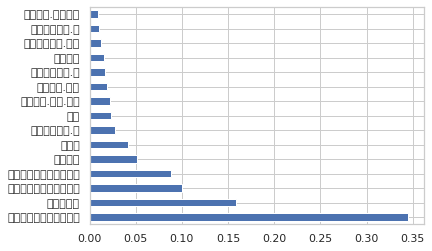

In [44]:
# 特徵重要性畫圖
feat_importances = feats.nlargest(15)
feat_importances.plot(kind='barh')

In [45]:
# 特徵重要性大概多少%的選擇資料

def get_feature_percent(original_feats, percent):
    result = 0
    percent_columns = []
    for i, v in enumerate(original_feats):
        result += v
        percent_columns.append(original_feats.index[i])
        if result >= percent:
            break
    return percent_columns

percent_columns = get_feature_percent(feats, 0.90)

print(get_feature_percent(feats, 0.9))
# # 存成csv
# data[get_feature_percent(feats, 0.9)].to_csv('90%data_區總價_HP.csv')

['建物移轉總面積平方公尺', '車位總價元', '土地移轉總面積平方公尺', '車位移轉總面積平方公尺', '總樓層數', '區總價', '建物現況格局.衛', '屋齡', '交易標的.房地.車位', '交易標的.房地', '建物現況格局.房', '移轉層次']


In [46]:
# 根據特徵重要性擷取後, 重新測一下準確度是否改變太多
# 大約下降了4個百分點, 正常情況下, 不考慮。

# 90%DATA
X_test = X_test[percent_columns]
X_train = X_train[percent_columns]

# model train and predict
rndf = RandomForestRegressor(bootstrap=True, max_depth=100, max_features=10, min_samples_split=3, n_estimators=200)
rndf.fit(X_train, y_train)

y_pred_test = rndf.predict(X_test)

print(hit_rate(y_pred_test, y_test, 0.1))
print(hit_rate(y_pred_test, y_test, 0.2))

0.37551673556474197
0.6366182157621016
